In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 2

In [2]:
# Generate a random 3x2 matrix A
A = np.random.rand(3, 2)

# Perform QR factorization of A
Q, R = np.linalg.qr(A)

# Check the correctness of the factorization
QR = np.dot(Q, R)
print(f"Is QR = A? {np.allclose(QR, A)}")

Is QR = A? True


In [3]:
print("Q=\n",Q)
# To check that they are orthogonal
q1 = Q[:,0]
q2 = Q[:,1]
print(f"\n<q1,q2> = {q1@q2:.3f}")
print()
# To check that they are of unit length
print(f"||q1||={np.linalg.norm(q1):.2f}, ||q2||={np.linalg.norm(q2):.2f}.")
print()
print("R=\n",R)

Q=
 [[-0.63465501  0.33552822]
 [-0.44004797 -0.89742642]
 [-0.63527222  0.28643785]]

<q1,q2> = 0.000

||q1||=1.00, ||q2||=1.00.

R=
 [[-1.56366283 -0.77989191]
 [ 0.         -0.51539653]]


In [4]:
# Define a function to compute the Frobenius norm of a matrix
def frobenius_norm(matrix):
    return np.sqrt(np.sum(np.abs(matrix)**2))

# Calculate the Frobenius norm of the difference between QR and A
frobenius_norm_diff = frobenius_norm(QR - A)
print(f"Frobenius norm of the difference between QR and A: {frobenius_norm_diff}")


Frobenius norm of the difference between QR and A: 3.6821932062951477e-16


## Question 4

In [5]:
def jacobi_method(A, b, x0, max_iter=1000, tol=1e-5, get_res=False):
   
    # Initialize variables for iteration
    x = x0.copy()
    D = np.diag(A) # Also considered as M
    N = A - np.diag(D) # Also considered as L + U
    diff = np.inf
    iter_count = 0

    # Track all the update values of x
    x_new = []
    
    if get_res:
        # If we need to track the residuals
        residual = []
        
    # Perform Jacobi iterations until convergence or maximum iterations reached
    while diff > tol and iter_count < max_iter:
        
        # Update each element of x using the Jacobi formula
        latest_x = (b - np.dot(N, x)) / D
        x_new.append( latest_x )

        # Calculate the difference between the current and updated solutions
        diff = np.linalg.norm(latest_x - x)
        if get_res:
            residual.append(np.linalg.norm(A@latest_x - b))

        # Update the current solution
        x = latest_x
        iter_count += 1
        
    if get_res:
        # we will only need the resudual for our plot
        return residual
        # for this case, the code will terminate here.

    if iter_count >= max_iter:
        print("Maximum iteration reached!")
        print(r"$||x_{k+1} - x_k||_2$"+f"={diff:.4f} > tol = {tol}")
        
    return x , iter_count


Test your function on a $3\times3$ system of equations. Experiment with different initial guesses, maximum number of iterations, and tolerance levels. Plot the norm of the residual vector as a function of the number of iterations. What do you observe about the convergence of the method?

In [6]:
A = np.array([[7, 2, 3],
             [2, 4, 0.3],
             [5, 0.2, -6]])
b = np.array([-4, 1, 3])

In [7]:
# Solve with built-in numpy solver
x = np.linalg.solve(A,b)

# Solve with our Jacobi function
# Set initial guess, maximum iterations, and tolerance
x0 = np.array([-1,1,1])
max_iter = 100
tol = 1e-6

# You can experiment with all the parameters and see how this affects your result.
x_jac, iter_count = jacobi_method(A, b, x0, max_iter, tol)
print(f"It took {iter_count} iterations.")

print(f"Are the solutions close? {'Yes' if np.allclose(x, x_jac) else 'No'}.")

print(f"Numpy solver: x={x}")
print(f"Jacobi solver: x={x_jac}")

It took 21 iterations.
Are the solutions close? Yes.
Numpy solver: x=[-0.37278993  0.49595445 -0.79412646]
Jacobi solver: x=[-0.37278963  0.49595476 -0.79412684]


In [8]:
# Non-diagonally dominant example
A = np.array([[1, 2, 3],
            [2, 4, 1],
            [3, 1, 5]])
b = np.array([3, 16, -3])

print(f"Solution is {np.linalg.solve(A,b)}.")

print("\nFor Jacobian method:")
x_init = np.random.randn(3)
jacobi_method(A, b, x0 = x_init)

Solution is [ 1.  4. -2.].

For Jacobian method:
Maximum iteration reached!
$||x_{k+1} - x_k||_2$=inf > tol = 1e-05


(array([-1.12241650e+252, -3.73103898e+251, -4.19092873e+251]), 1000)

Solution: [ 2.41772169 -0.7974686   1.53164579]
Number of iterations: 41


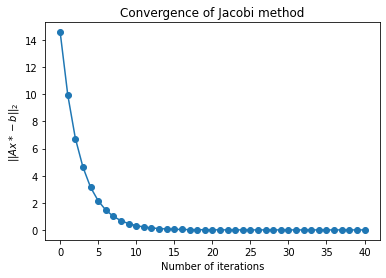

In [9]:
# Define the system of equations
A = np.array([[4, -1, 1],
              [-1, 5, -3],
              [1, -3, 6]])
b = np.array([12, -11, 14])

# Set initial guess, maximum iterations, and tolerance
x0 = np.zeros_like(b)
max_iter = 100
tol = 1e-6

# Solve the system using the Jacobi method
x, iter_count = jacobi_method(A, b, x0, max_iter, tol)

# Print the solution and number of iterations
print("Solution:", x)
print("Number of iterations:", iter_count)

# Calculate the norm of the residual vector at each iteration
residuals = jacobi_method(A, b, x0, max_iter, tol, get_res=True)

# Plot the norm of the residual vector as a function of iterations
plt.plot(range(len(residuals)), residuals,'-o')
plt.xlabel("Number of iterations")
plt.ylabel("$||Ax* - b||_2$")
plt.title("Convergence of Jacobi method")
plt.show()


## Observations about the convergence of the Jacobi method:

* The Jacobi method converges to the correct solution for strictly diagonally dominant systems of equations.

* The rate of convergence depends on the initial guess and the dominance of the diagonal elements.

* The tolerance level determines the accuracy of the solution. A smaller tolerance will result in a more accurate solution, but it may require more iterations.

* The norm of the residual vector decreases monotonically with each iteration, indicating that the solution is getting closer to the correct value.

* The Jacobi method is not guaranteed to converge for all systems of equations. Some systems may require a different iterative method.